In [65]:

import tensorflow as tf
import tensorflow.keras
from keras.models import load_model,Sequential,Input
from gensim.models import Word2Vec
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,BatchNormalization,Dropout
from keras.models import Sequential
import os
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.metrics import classification_report
 

In [57]:
os.chdir(r"C:\Users\HP\data\Brain_tumor_classification")

In [ ]:
model.add(Conv2D(filters=32,activation='relu',padding='same',use_bias=True,kernel_size=(5,5),input_shape=(200,200,3)))
model.add(MaxPooling2D(padding='valid',pool_size=(2,2)))

model.add(Conv2D(filters=64,activation='relu',padding='valid',use_bias=True,kernel_size=(5,5)))
model.add(MaxPooling2D(padding='valid',pool_size=(2,2)))

model.add(Conv2D(filters=64,activation='relu',padding='valid',use_bias=True,kernel_size=(5,5)))
model.add(MaxPooling2D(padding='valid',pool_size=(2,2)))

model.add(Conv2D(filters=128,activation='relu',padding='same',use_bias=True,kernel_size=(5,5)))
model.add(MaxPooling2D(padding='valid',pool_size=(2,2)))

model.add(Conv2D(filters=256,activation='relu',padding='same',use_bias=True,kernel_size=(5,5)))
model.add(MaxPooling2D(padding='valid',pool_size=(2,2)))



model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))


In [41]:
 model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

In [22]:
generator=ImageDataGenerator(rescale=1/255,horizontal_flip=True,vertical_flip=True,rotation_range=45,zoom_range=0.25,validation_split=0.2)

In [36]:
def load_training_data():
    training_data=generator.flow_from_directory('Training',color_mode='rgb',class_mode='categorical',target_size=(200,200),subset='training')
    validation_data=generator.flow_from_directory('Training',color_mode='rgb',class_mode='categorical',target_size=(200,200),subset='validation')
    return (training_data,validation_data)

In [62]:
def load_testing_data():
    testing_data=generator.flow_from_directory('Testing',color_mode='rgb',class_mode='categorical',target_size=(200,200))
    return (testing_data)

In [37]:
train_data,val_data=load_training_data()

Found 2297 images belonging to 4 classes.
Found 573 images belonging to 4 classes.


In [63]:

testing=load_testing_data()

Found 394 images belonging to 4 classes.


In [64]:
pred_data=model.predict_classes(testing,batch_size=None,verbose=1)

13/13 [==============================] - 44s 3s/step


In [39]:
loss=keras.losses.CategoricalCrossentropy()
model.compile(loss=loss,optimizer='adam',metrics=['accuracy'])

In [41]:
history=model.fit(train_data,epochs=10,validation_data=val_data,verbose=1)

Epoch 1/10
72/72 [==============================] - 357s 5s/step - loss: 0.8718 - accuracy: 0.6291 - val_loss: 1.1255 - val_accuracy: 0.5218
Epoch 2/10
72/72 [==============================] - 296s 4s/step - loss: 0.8344 - accuracy: 0.6513 - val_loss: 1.3056 - val_accuracy: 0.5288
Epoch 3/10
72/72 [==============================] - 294s 4s/step - loss: 0.7865 - accuracy: 0.6643 - val_loss: 1.1205 - val_accuracy: 0.4904
Epoch 4/10
72/72 [==============================] - 301s 4s/step - loss: 0.7521 - accuracy: 0.6879 - val_loss: 1.1108 - val_accuracy: 0.5148
Epoch 5/10
72/72 [==============================] - 310s 4s/step - loss: 0.7029 - accuracy: 0.7005 - val_loss: 0.9372 - val_accuracy: 0.5620
Epoch 6/10
72/72 [==============================] - 313s 4s/step - loss: 0.6952 - accuracy: 0.7083 - val_loss: 1.1575 - val_accuracy: 0.6091
Epoch 7/10
72/72 [==============================] - 309s 4s/step - loss: 0.6561 - accuracy: 0.7196 - val_loss: 1.0160 - val_accuracy: 0.5829
Epoch 8/10
72

In [45]:
#plotting the losses and accuracy :

model_loss=history.history['loss']
model_accuracy=history.history['accuracy']
val_loss=history.history['val_loss']
val_accuracy=history.history['val_accuracy']


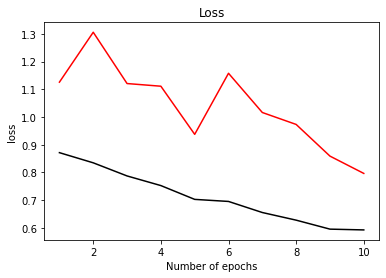

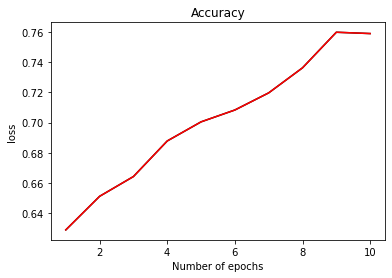

In [47]:
import matplotlib.pyplot as plt
epochs=range(1,11)

plt.plot(epochs,model_loss,c='black')
plt.plot(epochs,val_loss,c='red')
plt.xlabel('Number of epochs')
plt.ylabel('loss')
plt.title('Loss')
plt.show()



plt.plot(epochs,model_accuracy,c='black')
plt.plot(epochs,model_accuracy,c='red')
plt.xlabel('Number of epochs')
plt.ylabel('loss')
plt.title('Accuracy')
plt.show()

In [113]:
class_names=["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumour"]

In [110]:
model.save('MRIac29.h5')
 

In [91]:
labels=testing.labels


In [94]:
pred=model.predict_classes(testing,batch_size=None)

In [96]:
 matrix=confusion_matrix(pred,labels)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

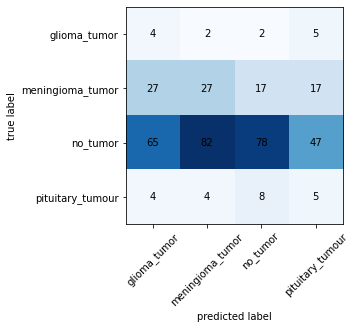

In [114]:
plot_confusion_matrix(matrix,class_names=class_names)

In [111]:
lables={0:"glioma_tumor",1:"meningioma_tumor",2:"no_tumor",3:"pituitary_tumour"}

In [106]:
print(classification_report(labels,pred))

              precision    recall  f1-score   support

           0       0.31      0.04      0.07       100
           1       0.31      0.23      0.27       115
           2       0.29      0.74      0.41       105
           3       0.24      0.07      0.11        74

    accuracy                           0.29       394
   macro avg       0.28      0.27      0.21       394
weighted avg       0.29      0.29      0.23       394

